In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


The dataset was extracted from Kaggle. URL link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [2]:
df=pd.read_csv("Customer-Churn-Records.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
#Checking and we see that there is no missing values
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
#Checking how many time a same surname occurs in the column
df.value_counts(['Surname'])

Surname   
Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Etheridge      1
Milliner       1
Milligan       1
Eva            1
Kuykendall     1
Name: count, Length: 2932, dtype: int64

In [7]:
#Seeing that the 'CustomerId is unique
#We come to the conclusion that its best to drop 'Surname' column and keep the 'CustomerId' to identify the customers more precisely. 
df.value_counts(['CustomerId'])

CustomerId
15565701      1
15732281      1
15732199      1
15732202      1
15732235      1
             ..
15649297      1
15649354      1
15649359      1
15649379      1
15815690      1
Name: count, Length: 10000, dtype: int64

In [8]:
df.drop(['Surname'],axis=1, inplace=True)
df.head(5)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
df.drop(['RowNumber','CustomerId'],axis=1, inplace=True)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [11]:
df.describe().round()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0,0.0,3.0,607.0
std,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0,0.0,1.0,226.0
min,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1.0,119.0
25%,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0,0.0,2.0,410.0
50%,652.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0,0.0,3.0,605.0
75%,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0,0.0,4.0,801.0
max,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0,1.0,5.0,1000.0


In [12]:
#One-hot Label Encoding to change categorical variables into continuous variables
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [13]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [14]:
df.shape

(10000, 21)

In [15]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


**Splitting the data to target variable and into test and train data**

In [16]:
X = df.drop(['Exited'], axis=1)  #'Exited' is the target column
y = df['Exited'] 

X.shape


(10000, 20)

In [17]:
# Converting boolean columns to numeric
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype('int64')


In [18]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


In [19]:
np.random.seed(42)  
#Choosing training indices
ind_train = np.random.choice(X.shape[0], size=int(X.shape[0] * 0.8), replace=False)

#Boolean indexing for train and test splitting data
bool_ind_train = np.in1d(range(X.shape[0]), ind_train)

X_train = X[bool_ind_train]
y_train = y[bool_ind_train]
X_test = X[~bool_ind_train]
y_test = y[~bool_ind_train]



print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (8000, 20)
y_train.shape: (8000,)
X_test.shape: (2000, 20)
y_test.shape: (2000,)


 **Implementing Feature selection using Joint Mutual Information Maximisation**

In [20]:
#entropy formula
def entropy(series):
  counts = series.value_counts(normalize=True)
  return -sum(count * math.log2(count) for count in counts)

def mutual_information(x, y):
  #using joint probability distribution
  joint_counts = pd.crosstab(x, y, normalize='all') #
  joint_entropy = - (joint_counts * np.log2(joint_counts + 1e-10)).sum().sum()
  x_entropy = entropy(x)
  y_entropy = entropy(y)

  #mutual information formula
  return x_entropy + y_entropy - joint_entropy


def JMIM_feature_selection(X, y, num_features, mi_weight=0.9, min_entropy=0.1):
  selected_features = []
  remaining_features = set(X.columns)

  #initial selection. Filtering on entropy threshold and prioritize by mutual information
  scores = []
  for col in X.columns:
    entropy_score = entropy(X[col])
    if entropy_score >= min_entropy: 
      mi_score = mutual_information(X[col], y)
      scores.append((col, mi_score)) 
        
  #selecting the feature with the highest score
  best_feature_name = max(scores, key=lambda item: item[1])[0]
  selected_features.append(best_feature_name)
  remaining_features.remove(best_feature_name)

  #selecting remaining features based on mutual information
  for _ in range(num_features - 1):
    scores = [mutual_information(X[feature], y) 
              for feature in remaining_features]
    best_feature_index = np.argmax(scores) 
    best_feature = list(remaining_features)[best_feature_index]
    remaining_features.remove(best_feature) 
    selected_features.append(best_feature)

  return selected_features


In [21]:
selected_features = JMIM_feature_selection(X, y, num_features=7, min_entropy=0.1)
print(selected_features)


['EstimatedSalary', 'Complain', 'Balance', 'Age', 'NumOfProducts', 'Point Earned', 'CreditScore']


 **Implementing Neural Network model**

In [22]:
#weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
   
    return parameters

parameters = initialize_parameters(input_size=2, hidden_size=5, output_size=1)


#sigmoid activation function
def sigmoid(x):
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))



def forward_propagation(X, parameters):
    X_array = X.to_numpy()
    W1 = parameters["W1"]  # Access the value using the key
    b1 = parameters["b1"]
    W2 = parameters["W2"] 
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X_array.T) + b1
    #clipping Z1 to prevent overflows warnings
    Z1 = np.clip(Z1, -500, 500)
    A1 = sigmoid(Z1)

    #activation of the output layer
    Z2 = np.dot(W2, A1) + b2
    Z2 = np.clip(Z2, -500, 500)

    
    A2 = sigmoid(Z2)
    A2 = A2.reshape(1,-1) #reshaping to a row vector
    A2 = np.clip(A2, 1e-15, 1 - 1e-15) #cliping values to avoid log(0)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache


def binary_cross_entropy_loss(A2, y):
    m = y.shape[0]
    loss = -(1/m) * np.sum(y.to_numpy()*np.log(A2) + (1-y.to_numpy())*np.log(1-A2))
    return loss


def backward_propagation(parameters, cache, X, y):
    m = y.shape[0]
    
    #converting X and y to numpy arrays
    X_array = X.to_numpy()
    y_array = y.to_numpy()

    #retrieving the intermediate values
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    #derivative of the loss with respect to A2
    dA2 = - (y_array/A2) + ((1-y_array)/(1-A2))

    #the derivative of the activation function of the output layer
    dZ2 = dA2 * (A2 * (1-A2))
    
    #the derivative of the weights and biases of the output layer
    dW2= (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.mean(dZ2, axis=1)  

    #derivative of the activation function of the hidden layer
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 = dA1 * (A1 * (1-A1))
    
    #derivative of the weights and biases of the hidden layer
    dW1 = (1/m) * np.dot(dZ1, X_array)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients


def update_parameters(parameters, gradients, learning_rate):
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #updating the weights and biases
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

def train(X, y, hidden_layer_size, num_iterations, learning_rate):
    parameters = initialize_parameters(X.shape[1], hidden_layer_size, 1)
    loss_values = []  #empty list for loss values
    convergence_counter = 0 
    previous_loss = float("inf")  

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        loss = binary_cross_entropy_loss(A2, y)

        #implementing earlyStopping
        if abs(previous_loss - loss) < 1e-5:
            convergence_counter += 1
        else:
            convergence_counter = 0

        if convergence_counter >= 10:
            print("Converged at iteration:", loss)
            break  

        previous_loss = loss  
        loss_values.append(loss)

        gradients = backward_propagation(parameters, cache, X, y)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if i % 1000 == 0:
            print(f"iteration {i}: loss = {loss}")

    return loss_values, parameters



**Training the model with the selected features we got from JMIM**

iteration 0: loss = 0.6901549225812588
Converged at iteration: 0.5064154994660033


Text(0, 0.5, 'SSE')

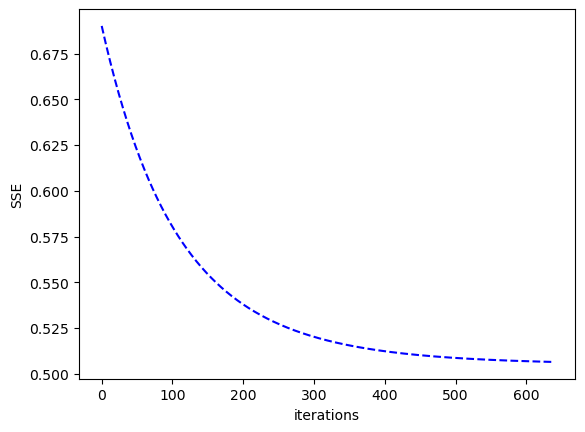

In [23]:
loss_values ,parameters = train(X_train[selected_features], y_train, hidden_layer_size=5, num_iterations=10000, learning_rate=0.01)
plt.plot(range(len(loss_values)), loss_values, '--b')
plt.xlabel("iterations")
plt.ylabel("SSE")

The value 0.5064154994660033 is the final loss achieved by the model when it convergedd, meaning that the model learned and improved its predictions over training.

**Predicting the model on unseen data**

In [24]:
def predict(X_test, y_test, parameters):
    A2, _ = forward_propagation(X_test, parameters)
    predictions = np.where(A2 >= 0.5, 1, 0)
    # Calculate accuracy
    accuracy = np.mean(predictions == y_test.values.reshape(1,-1))
    return accuracy


In [25]:
accuracy = predict(X_test[selected_features], y_test, parameters)
print(f"Test set accuracy: {accuracy * 100:.2f}%")



Test set accuracy: 79.45%


**Here finally the Neural Network model with the selected features from JMIM has acheived the accuracy of 79.45%, The model is correctly predicting the data from test data. This shows that the model has learned meaningful patterns and performes well on unseen data.** 

Note: There is always room for improvement, hence  this dataset had an imbalance distribution on the target column['Exited'] that i tried to oversampled it but it got too complex for me and i decided to skip it